<a href="https://colab.research.google.com/github/Rochakr4/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [2]:
#let's take help of following libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  
from wordcloud import WordCloud 
import plotly.graph_objects as go

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 27.7 MB 1.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
raw_global_terrorismdata=pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
global_terrorismdata=raw_global_terrorismdata.copy()

In [7]:
global_terrorismdata['country_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['region_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['city'].fillna('Unknown',inplace=True)
global_terrorismdata['provstate'].fillna('Unknown',inplace=True)
global_terrorismdata['nwoundte'].fillna(0,inplace=True)
global_terrorismdata['ransomamt'].fillna(0,inplace=True)
global_terrorismdata['ransompaid'].fillna(0,inplace=True)
global_terrorismdata['success'].fillna('Unknown',inplace=True)
global_terrorismdata['attacktype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['targtype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['gname'].fillna('Unknown',inplace=True)
global_terrorismdata['weaptype1_txt'].fillna('Unknown',inplace=True)
global_terrorismdata['nkill'].fillna(0,inplace=True)
global_terrorismdata['nwound'].fillna(0,inplace=True)
global_terrorismdata['propvalue'].fillna(0,inplace=True)
global_terrorismdata['property'].fillna(0,inplace=True)
global_terrorismdata['nkillter'].fillna(0,inplace=True)
global_terrorismdata['alternative_txt'].fillna('unknown',inplace=True)
global_terrorismdata['doubtterr'].fillna(0,inplace=True)
global_terrorismdata['hostkidoutcome_txt'].fillna('Unknown',inplace=True)

In [6]:
na_coloumn=[]
for i in list(global_terrorismdata):
  if ((global_terrorismdata[i].isna().sum())*100/181691)>0:
    na_coloumn.append(i)
for i in na_coloumn:
   global_terrorismdata.drop(i, inplace=True, axis=1)
     

In [7]:
global_terrorismdata.rename(columns={'iyear':'YEAR',
                           'imonth':'MONTH',
                           'iday':'DAY',
                           'country_txt':'COUNTRY',
                           'region_txt':'REGION',
                           'success':'SUCCESS',
                           'provstate':'STATE',
                           'attacktype1_txt':'ATTACK TYPE',
                           'targtype1_txt':'TARGET TYPE',
                           'gname':'ORGANISATION',
                           'weaptype1_txt':'WEAPON TYPE',
                           'nwound':'NO. OF WOUNDED',
                           'nkill':'NO. OF KILLED',
                           'nwoundte':'CULPRIT WOUNDED',
                           'ransomamt':'RANSOM AMOUNT',
                           'ransompaid':'RANSOM AMOUNT PAID',
                           'nkillter':'CULPRIT KILLED',
                           'doubtterr':'DOUBT TERROR',
                           'dbsource':'DATA BASE SOURCE'},inplace=True)

In [8]:
global_terrorismdata['CASUALITY']=global_terrorismdata['NO. OF KILLED']+global_terrorismdata['NO. OF WOUNDED']

In [9]:
total_attacks=px.choropleth( global_terrorismdata.groupby(['YEAR','COUNTRY'])['eventid'].count().reset_index(),locations='COUNTRY',locationmode='country names',color='eventid',
                            template='plotly_dark', hover_name='COUNTRY',
                            title='NUMBER OF ATTACKS PER YEAR(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            animation_frame='YEAR',labels={'eventid':'NO. OF ATTACKS'})
total_attacks.show()

In [10]:
total_casuality=px.choropleth( global_terrorismdata.groupby('COUNTRY')['CASUALITY'].sum().reset_index(),locations='COUNTRY',locationmode='country names',color='CASUALITY',
                            template='plotly_dark', hover_name='COUNTRY',
                            title='TOTAL NUMBER OF CASUALITIES(1970-2017)',
                            color_continuous_scale = px.colors.sequential.OrRd,
                            labels={'CASUALITY':'NO. OF CASUALITIES'})
total_casuality.show()

In [11]:
global_terrorismdata.groupby('COUNTRY')['eventid'].count().sort_values(ascending=False).head(4)

COUNTRY
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Name: eventid, dtype: int64

In [12]:
(global_terrorismdata.groupby('COUNTRY')['CASUALITY'].sum()/global_terrorismdata.groupby('COUNTRY')['eventid'].count()).sort_values(ascending=False).head(5)

COUNTRY
South Vietnam    81.000000
Chad             30.769231
Barbados         26.333333
Rwanda           26.150943
Djibouti         19.818182
dtype: float64

In [ ]:
global_terrorismdata.groupby(['YEAR'])['eventid'].count().sort_values(ascending=False)

In [ ]:
global_terrorismdata.groupby('YEAR')['CASUALITY'].sum()

In [ ]:
plt.rcParams['figure.figsize']=[25,10]

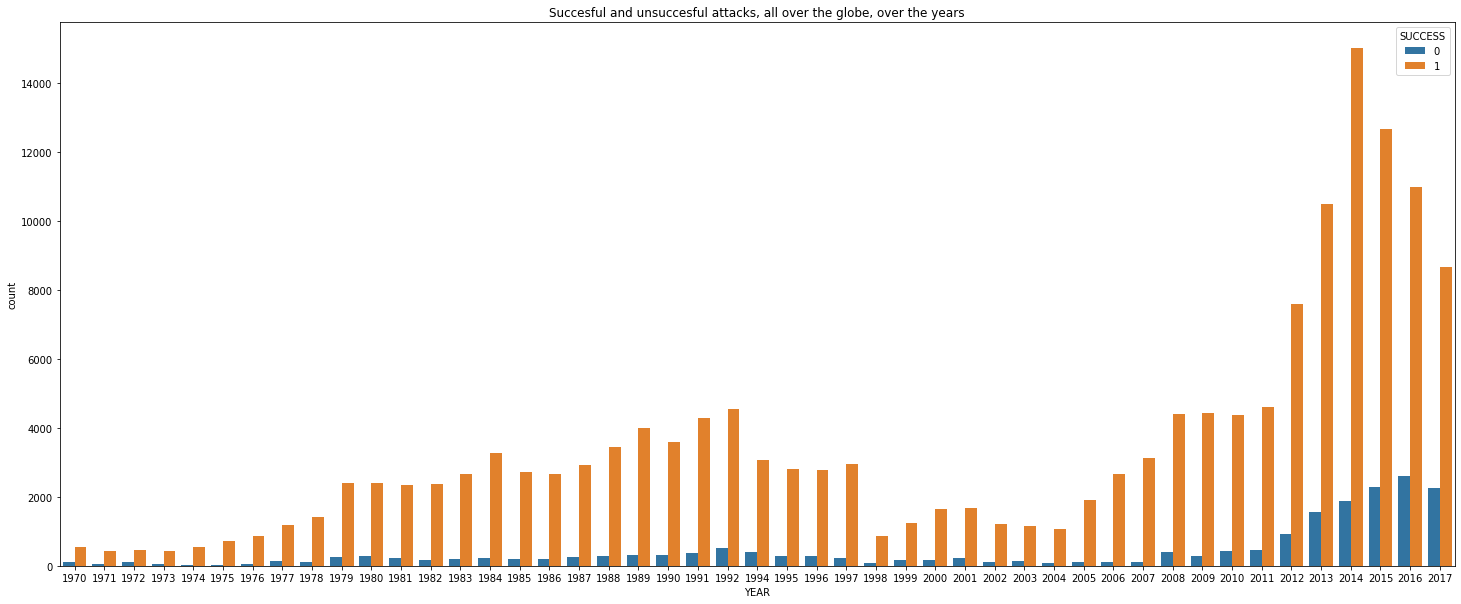

In [ ]:
sns.countplot(x='YEAR',hue='SUCCESS',data=global_terrorismdata)
plt.title('Succesful and unsuccesful attacks, all over the globe, over the years')
plt.show()

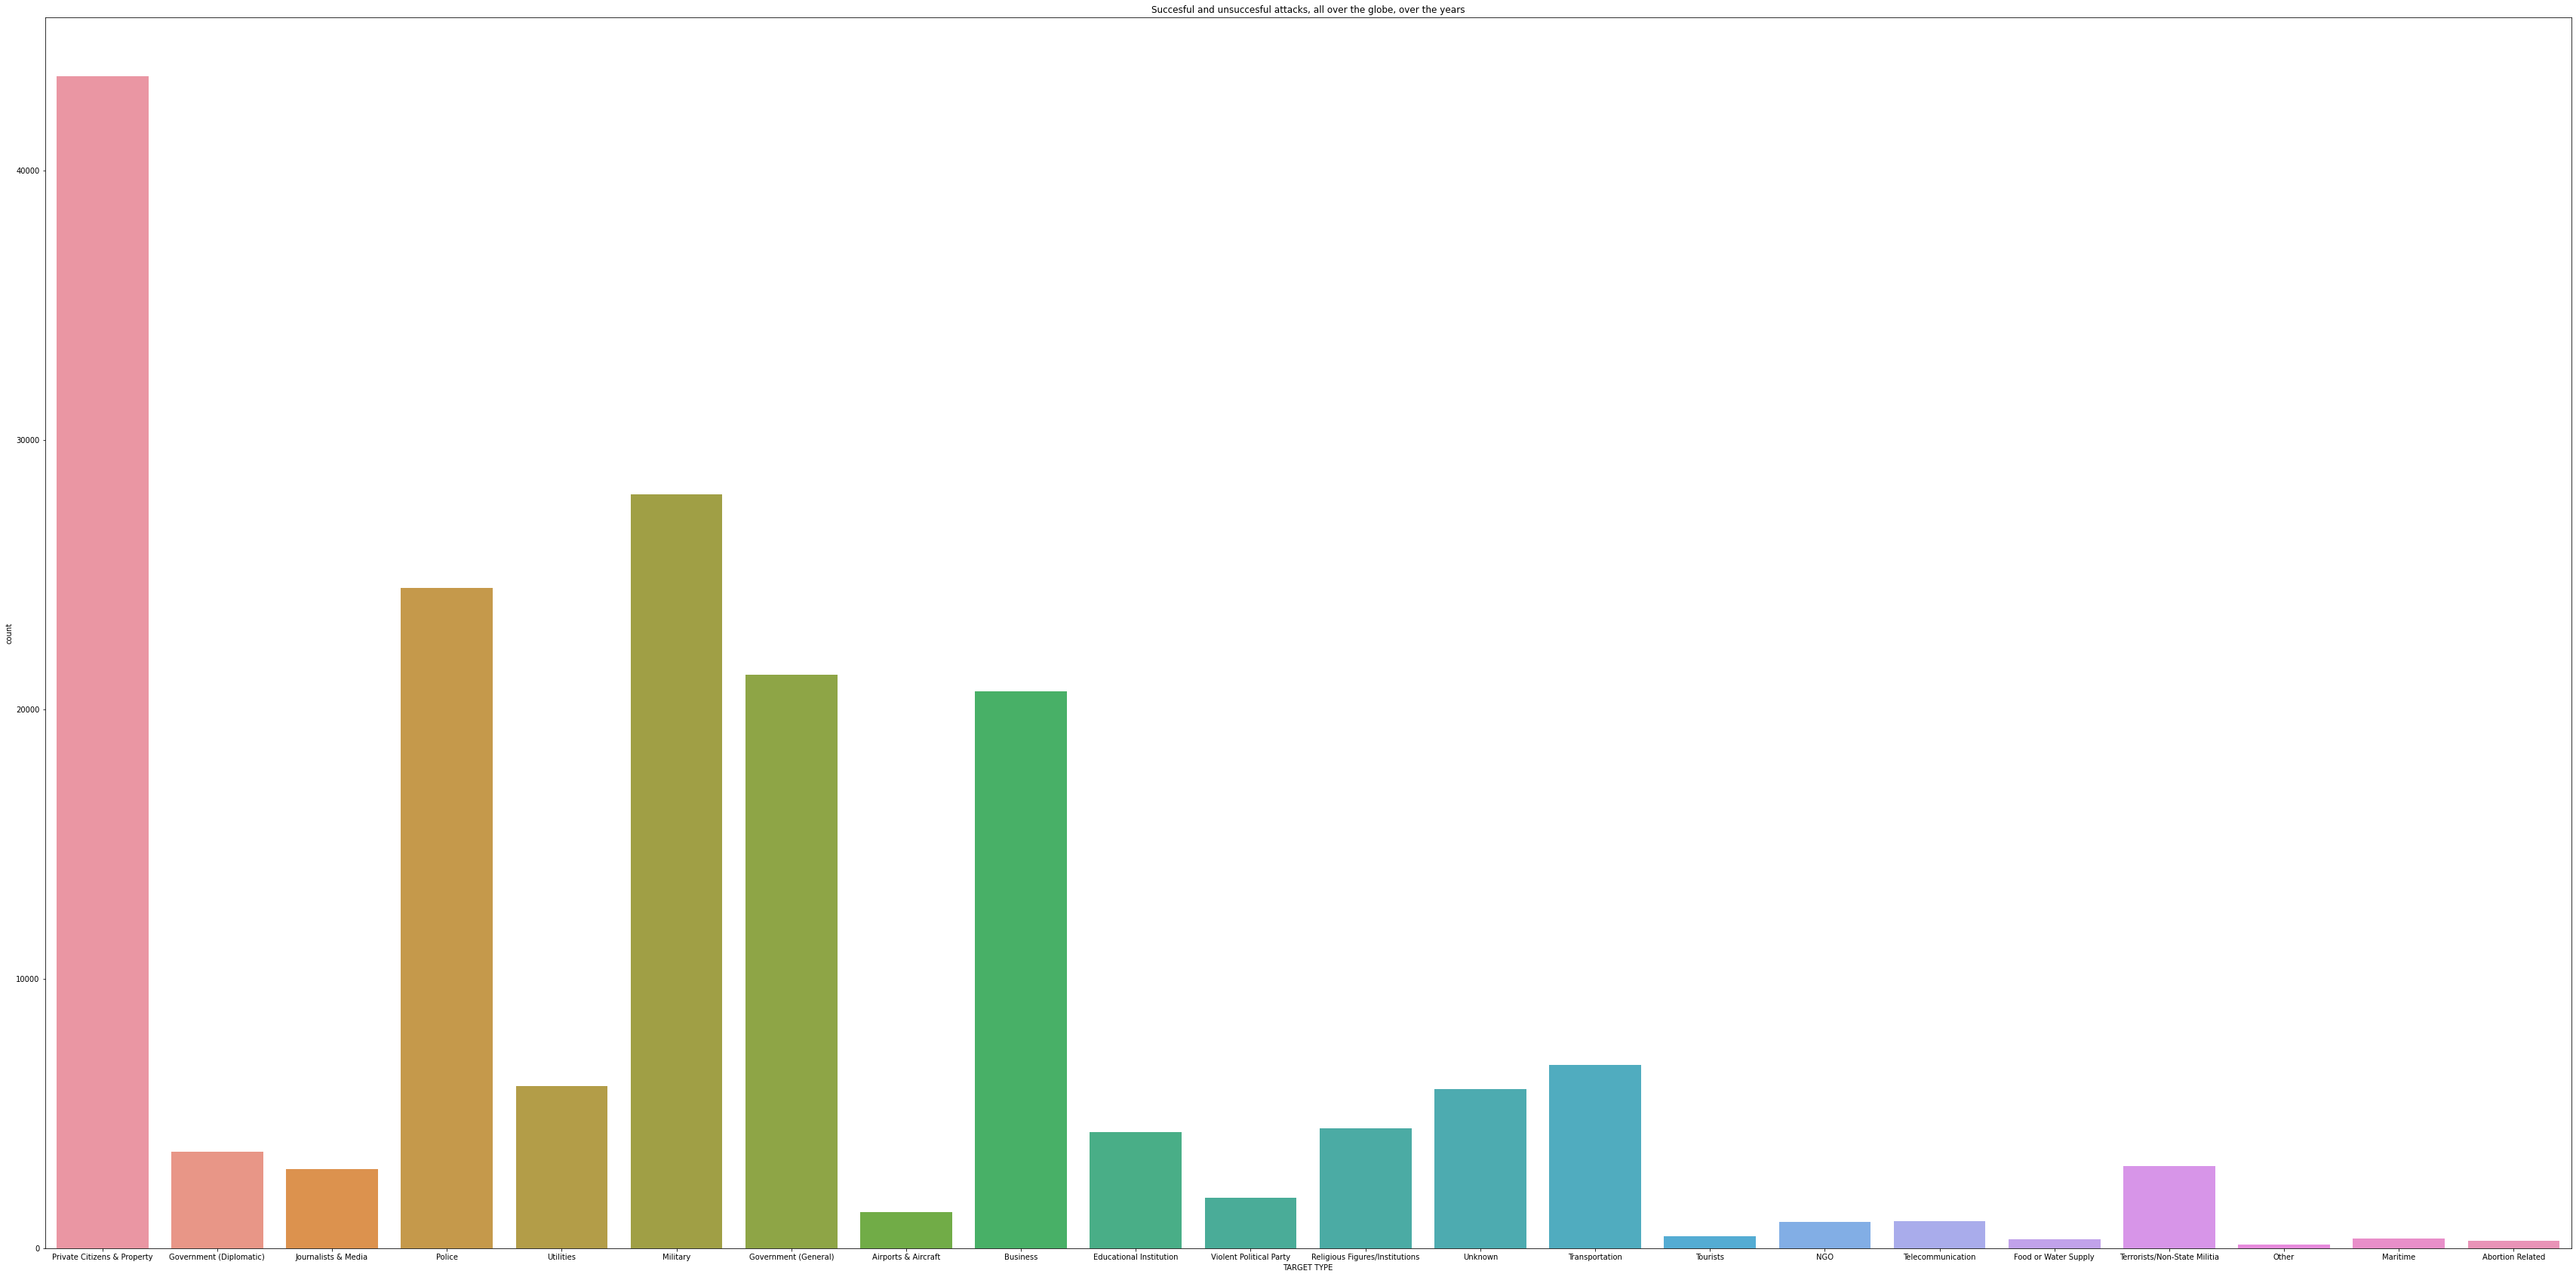

In [ ]:
plt.rcParams['figure.figsize']=[60,30]
sns.countplot(x='TARGET TYPE',data=global_terrorismdata)
plt.title('Succesful and unsuccesful attacks, all over the globe, over the years')
plt.show()

In [ ]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

In [9]:
px.pie(global_terrorismdata, values='TARGET TYPE', title='Population of European continent')
px.show()

ValueError: ignored